In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sqlalchemy import create_engine
import warnings

In [2]:
def millify(n):
    """make high numbers more readable """
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

In [3]:
warnings.filterwarnings("ignore")
uri = f'postgres://localhost/food_company'
engine = create_engine(uri, echo=False)

In [4]:
query = """ 
        SELECT *
        FROM train
        FULL OUTER JOIN meal_info 
        ON train.meal_id = meal_info.meal_id
        full outer JOIN fullfilment_info 
        ON train.center_id = fullfilment_info.center_id;
        """

In [5]:
explore_data = pd.read_sql(query, engine)
explore_data = explore_data.loc[:,~explore_data.columns.duplicated()]

In [6]:
explore_data.nunique()

index                    456548
week                        145
id                       456548
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

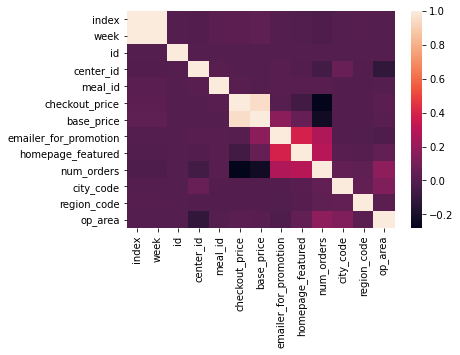

In [7]:
corr_mat = explore_data.corr()
sns.heatmap(corr_mat)
plt.savefig('../figs/correlation_matrix.pdf')

# Total orders

In [8]:
total_orders = explore_data.groupby(['week'])['num_orders'].sum()
total_orders = pd.DataFrame(total_orders)
total_orders.head()

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675


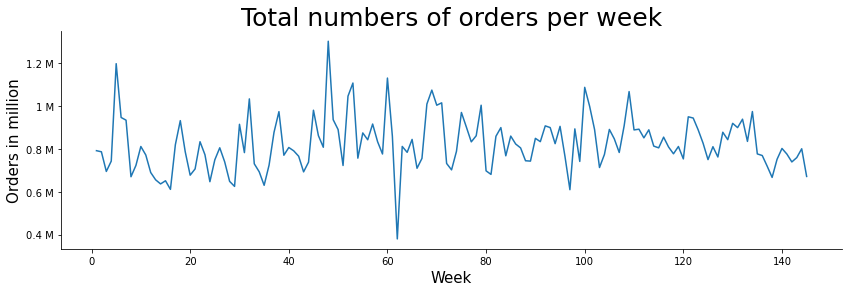

In [9]:
plt.figure(figsize=(14, 4))
total_fig = sns.lineplot( data=total_orders, 
                    x="week", 
                    y="num_orders")
total_fig.set_title(label="Total numbers of orders per week", loc='center', fontdict={'fontsize':25})
total_fig.set(yticklabels=["", "0.4 M", "0.6 M", "0.8 M", "1 M", "1.2 M"])
plt.xlabel("Week", size=15)
plt.ylabel("Orders in million", size=15)
sns.despine()
plt.savefig('../figs/total_per_week.pdf')

# Oders per center

In [10]:
center_id = explore_data.groupby(['center_id'])['num_orders'].sum()
center_id = pd.DataFrame(center_id)
center_id = center_id.reset_index()

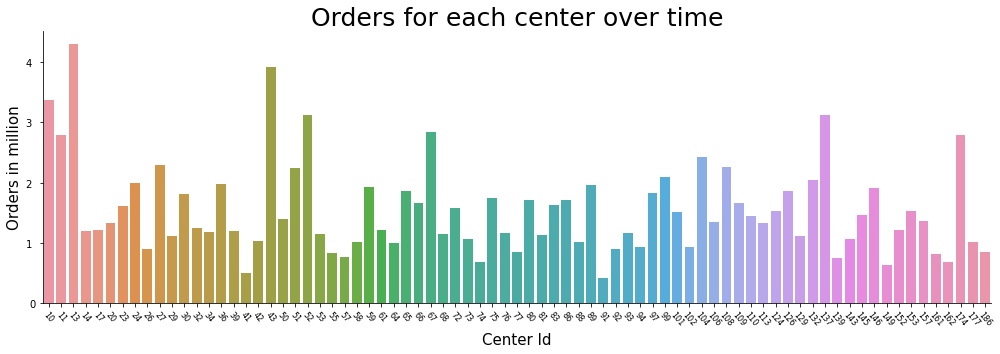

In [11]:
plt.figure(figsize=(17, 5))
center_fig = sns.barplot(data=center_id, 
                    x="center_id", 
                    y="num_orders")
center_fig.set_title(label="Orders for each center over time", loc='center', fontdict={'fontsize':25})
plt.xlabel("Center Id", size=15)
plt.ylabel("Orders in million", size=15)
center_fig.set_xticklabels(labels=center_id["center_id"], rotation=310, size=8)
center_fig.set_yticklabels(labels=['0', '1 ', '2 ', '3 ', '4 '], size=10)
sns.despine()
plt.savefig('../figs/center.pdf')

# Total orders per center type

In [12]:
total_orders_type = explore_data.groupby(["center_type","week"])["num_orders"].sum()
total_orders_type = pd.DataFrame(total_orders_type)

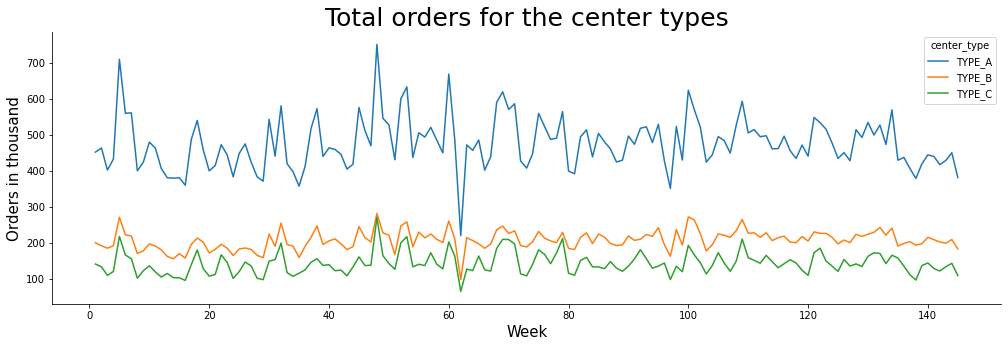

In [13]:
plt.figure(figsize=(17, 5))
type_fig = sns.lineplot(data=total_orders_type, 
                    x="week", 
                    y="num_orders",
                    hue="center_type")
type_fig.set_title(label="Total orders for the center types", loc='center', fontdict={'fontsize':25})
plt.xlabel("Week", size=15)
plt.ylabel("Orders in thousand", size=15)
type_fig.set_yticklabels(labels=['0','100', '200', '300', '400', '500', '600', '700'], size=10)
sns.despine()
plt.savefig('../figs/center_type.pdf')

# Total orders for each category

In [14]:
category = explore_data.groupby(['category'])['num_orders'].sum()
category = pd.DataFrame(category)
category = category.reset_index()

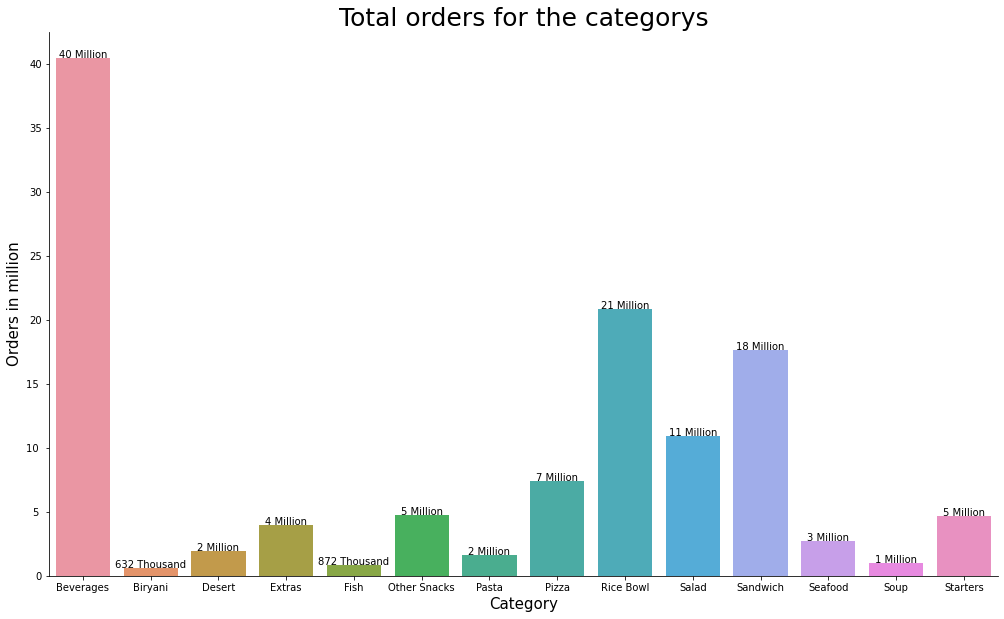

In [15]:
plt.figure(figsize=(17, 10))
category_fig = sns.barplot(data=category, 
                    x="category", 
                    y="num_orders")
category_fig.set_title(label="Total orders for the categorys", loc='center', fontdict={'fontsize':25})
plt.xlabel("Category", size=15)
plt.ylabel("Orders in million", size=15)
category_fig.set_yticklabels(labels=['0', '5 ', '10 ', '15 ', 
                                   '20', '25', '30', '35', '40'],
                             size=10)

for index, row in category.iterrows():
    category_fig.text(row.name, row.num_orders, millify(row.num_orders), color='black', ha="center")
sns.despine()
plt.savefig('../figs/categorys.pdf')

# Total orders for each cousine

In [16]:
cuisine = explore_data.groupby(['cuisine'])['num_orders'].sum()
cuisine = pd.DataFrame(cuisine)
cuisine = cuisine.reset_index()

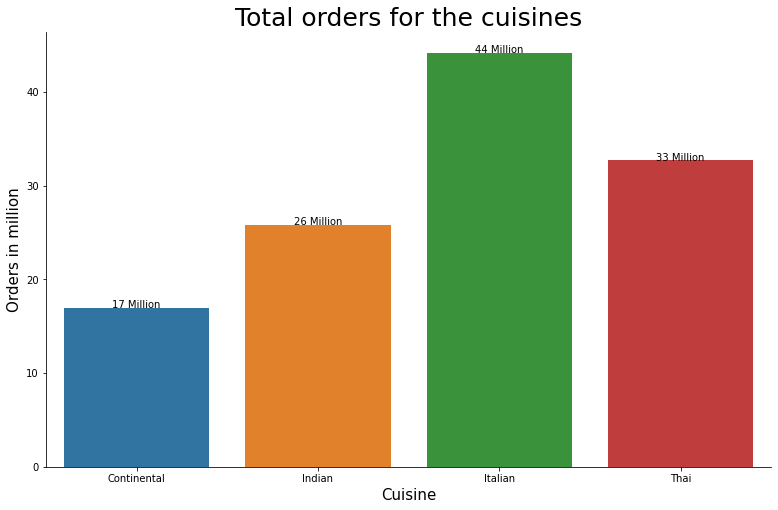

In [17]:
plt.figure(figsize=(13, 8))
cuisine_fig = sns.barplot(data=cuisine, 
                          x="cuisine", 
                          y="num_orders")
cuisine_fig.set_title(label="Total orders for the cuisines", 
                      fontdict={'fontsize':25,'horizontalalignment':'center'})
plt.xlabel("Cuisine", size=15)
plt.ylabel("Orders in million", size=15)
cuisine_fig.set_yticklabels(labels=['0', '10', '20', '30', '40'],size=10)

for index, row in cuisine.iterrows():
    cuisine_fig.text(row.name, row.num_orders, millify(row.num_orders), color='black', ha="center")
sns.despine()
plt.savefig('../figs/cuisine.pdf')

# Cuisines per center type

In [18]:
center_cuisine = explore_data.groupby(["center_type", "cuisine"])["num_orders"].sum()
center_cuisine = pd.DataFrame(center_cuisine)
center_cuisine = center_cuisine.reset_index()

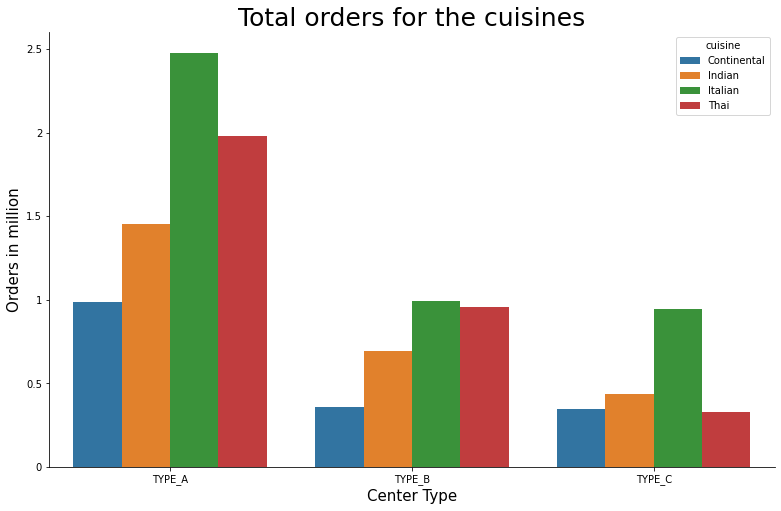

In [19]:
plt.figure(figsize=(13, 8))
center_cuisine_fig = sns.barplot(data=center_cuisine, 
                          x="center_type", 
                          y="num_orders",
                          hue="cuisine")
center_cuisine_fig.set_title(label="Total orders for the cuisines", 
                      fontdict={'fontsize':25,'horizontalalignment':'center'})
plt.xlabel("Center Type", size=15)
plt.ylabel("Orders in million", size=15)
center_cuisine_fig.set_yticklabels(labels=['0', '0.5', '1', '1.5', '2', '2.5'],size=10)

sns.despine()
plt.savefig('../figs/center_cuisine.pdf')

# Center with highest order number

In [20]:
explore_data.groupby("center_id").max().sort_values("num_orders", ascending=False)

,index,week,id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
center_id,,,,,,,,,,,,,,,
43,456122,145,1499876,2956,728.53,728.53,1,1,24299,Starters,Thai,590,56,TYPE_A,5.1
10,455985,145,1499954,2956,728.53,728.53,1,1,13580,Starters,Thai,590,56,TYPE_B,6.3
89,453882,145,1499987,2956,728.53,728.53,1,1,12489,Starters,Thai,703,56,TYPE_A,4.8
146,453763,145,1499962,2956,767.33,767.33,1,1,12327,Starters,Thai,526,34,TYPE_B,5.0
137,454392,145,1499981,2956,728.53,728.53,1,1,12177,Starters,Thai,590,56,TYPE_A,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,455668,145,1499365,2826,728.53,728.53,1,1,2823,Starters,Thai,590,56,TYPE_C,1.9
139,455009,145,1499907,2867,766.33,767.33,1,1,2741,Starters,Thai,693,34,TYPE_C,2.8
161,455049,145,1499994,2867,767.33,767.33,1,1,2726,Starters,Thai,658,34,TYPE_B,3.9


# Meal with highest total order number

In [21]:
explore_data.groupby("meal_id").sum().sort_values("num_orders", ascending=False).head()

,index,week,id,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
meal_id,,,,,,,,,,,,
2290,2485014024,814574,13931568501,927508,3019577.82,3171085.20,975,888,9770303,6689865,628513,44408.7
1885,2476558389,811796,13853935688,923342,1397345.30,1436529.10,394,2977,8346246,6664410,626257,44285.4
1754,2484580094,814388,13913255958,927144,3124630.88,3284884.51,1191,1443,6818059,6686685,628280,44378.6
1993,2480454860,813107,13880986039,925285,1402623.05,1439844.80,397,3000,6656856,6677934,627312,44347.2
1109,2483570823,814096,13924756123,927061,2989837.12,3370078.38,1148,1053,6367773,6687409,628333,44401.0
